# Assignment objective

We have data from Raleigh, NC, where we recently deployed a flyer program in order to increase public awareness of the possibility of taking a Pagaya loan. You objective is to assess the potency of the flyer program in terms of activation by analyzing production and TU data obtained from the town.


# Basic imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import scipy.stats as st
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(rc={'figure.figsize':(10,10)})

# Data preparation

## Data from TU 

To begin with, upload TUs credit information from the relevant quarter (which is 2018Q3). This data is available in our `s3` path under the name `tu_gen_data2018Q3.parquet`. To get to our `s3` path import `DATA_FILES_PATH` from `pagayapro.paths.data_paths`

In [2]:
from pagayapro.paths.data_paths import DATA_FILES_PATH

read the parquet file from `s3`. Only read the columns ["sequence_num", "credit_score", "listing_term", "int_rate", "loan_amnt", "monthly_pmt", "original_state"]

In [3]:
tu_data= pd.read_parquet(
    os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),
                columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state"])

Output the first 5 rows of tu_data

In [4]:
tu_data.head()

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN


## Activation data 

Your data regarding activation arrives as forms, detailing the loan amount, interest rate offered to the client and whether he or she accepted the offer. These are available on the assignment's `s3` path, which you can import from `pagayapro.path.data_paths` under the name `ASSIGNMENT1_DATA`, in the subdirectory `offers`. 

In [5]:
from pagayapro.paths.data_paths import ASSIGNMENT1_DATA
import glob

Read all files in the subdirectory `offers` of `ASSIGNMENT1_DATA` whose name contains the substring `raleigh`.

In [6]:
raleigh_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*raleigh*")
    )
)

how many forms are there?


In [7]:
len(raleigh_forms)

769

Read all the form files and create a table which contains only the last offer given to each borrower. Call this dataframe `raleigh_df`.

In [8]:
raleigh_df = pd.concat([pd.read_csv(form) for form in raleigh_forms])
raleigh_df['offer_date'] = pd.to_datetime(raleigh_df['offer_date'], format='%Y-%m-%d')
raleigh_df = raleigh_df.sort_values('offer_date').groupby('id', as_index=False).last()

How many rows are there in your table? How many distict ids?

In [9]:
print(f'There are {len(raleigh_df)} rows in the table and {len(raleigh_df.id.unique())} distinct ids.')

There are 8792 rows in the table and 8792 distinct ids.


How can you explain the duplicate ids? Sample 5 ids with multiple lines and display them.

> There aren't any duplicated ids.

Drop all lines in the dataframe which contain irrelevant information.

In [10]:
# none

What is the average interest rate offered to clients? What is the average among clients who accepted the offer?

In [11]:
print(f'Average interest rate offered to clients is {raleigh_df.offered_interest_rate.mean():.4f}')

Average interest rate offered to clients is 15.5243


In [12]:
print('Average interest rate offered to clients among clients who accepted the offer is', raleigh_df[raleigh_df['offer_accepted']==True].offered_interest_rate.mean())

Average interest rate offered to clients among clients who accepted the offer is 15.307480314960628


What is the percentage of activation in this dataframe?

In [13]:
raleigh_df.offer_accepted.mean()

0.08666969972702457

Enrich your dataframe with additioanl TU features by merging it with the `tu_data` df. Note that the two dataframe share the `id` and `sequence_num` features.

In [14]:
raleigh_df = raleigh_df.merge(tu_data, how='left', left_on = ['id','sequence_num'], right_on=[tu_data.index,'sequence_num'] )

In [15]:
raleigh_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
0,0000944c6eb064d675539d8deaff65acd38cecfba22862...,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02,791,60.0,12.30,5000.0,112.0,NC
1,0003290aea2ca5f7da83d2f32d0c783998906346e99892...,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29,645,36.0,24.88,3300.0,131.0,NC
2,0005ca5ea9f8399dddee878b7c9694d618a9a1b9d09152...,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10,703,36.0,12.94,3000.0,101.0,NC
3,00205f2f999895bde728aebcd83707fa204ec44e203b97...,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31,692,60.0,13.08,25000.0,570.0,NC
4,002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45b...,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23,606,36.0,33.77,3816.0,170.0,NC


In [16]:
# credit score is a three-digit number ranging from 300 to 850
print((raleigh_df.credit_score<300).mean()) 
print((raleigh_df.credit_score>850).mean())
# drop ouliers
raleigh_df = raleigh_df[raleigh_df.credit_score > 300]

0.0021610555050045497
0.0


What is the average credit score of the clients? What is the average among clients who accepted the offer?

In [17]:
raleigh_df.credit_score.mean()

691.3071925225123

In [18]:
raleigh_df[raleigh_df['offer_accepted']==True].credit_score.mean()

702.5446194225722

# Validations

Before we embark on a statistical test, let's do some validations to make sure that the Raleig sample is not somehow distinct from the general population. Our random sample from the general population is the TU data.

Create a histogram to describe the distribution of requested loan amounts in Raleigh and in the general population. Do the distributions look similar? (A good rule-of-thumb for the number of bins to use is the square-root of the number of unique value.)

In [19]:
tu_data['type'] = 'tu_data'
raleigh_df['type'] = 'raleigh_df'

The proportion of removed samples is: 0.04903025585432849


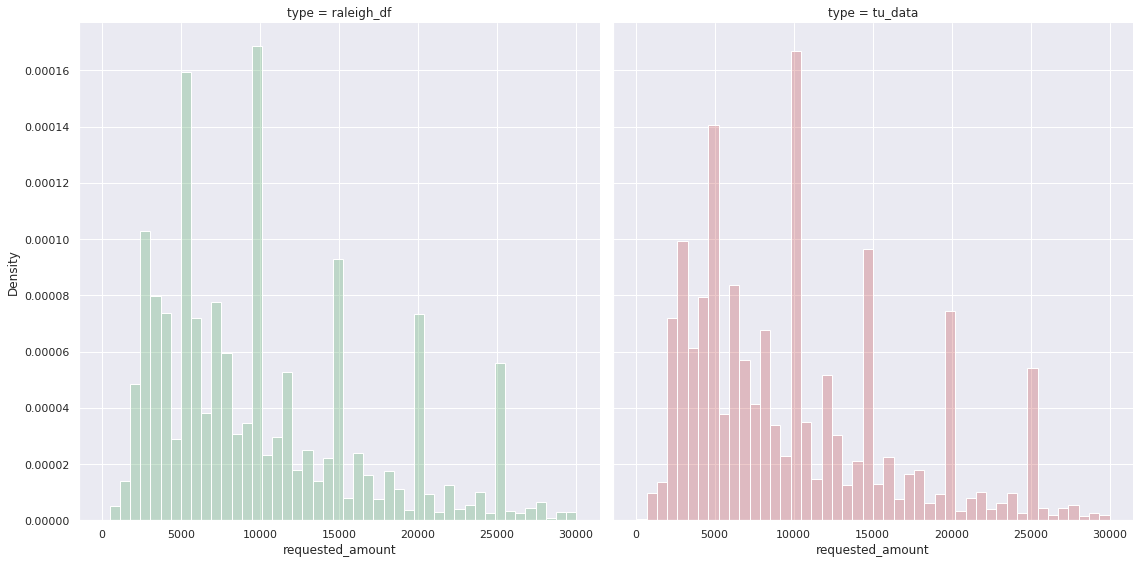

In [20]:
# density + remove outliers 
temp = pd.concat([raleigh_df[['requested_amount','type']],tu_data.rename(columns={'loan_amnt':'requested_amount'})[['requested_amount','type']]])
thr = temp['requested_amount'].quantile(.75) + 1.5*(temp['requested_amount'].quantile(.75)-temp['requested_amount'].quantile(.25))
print('The proportion of removed samples is:',(temp['requested_amount'] >thr).mean())
g = sns.FacetGrid(temp[temp['requested_amount'] < thr], col="type",hue="type", height=8, palette=['g','r'])
g.map(sns.histplot, "requested_amount",stat="density",bins=int(np.sqrt(len(raleigh_df['requested_amount'].unique()))), alpha=0.3);

Describe the loan amount distribution using `sns.distplot` in the Raleigh dataframe and in TU.

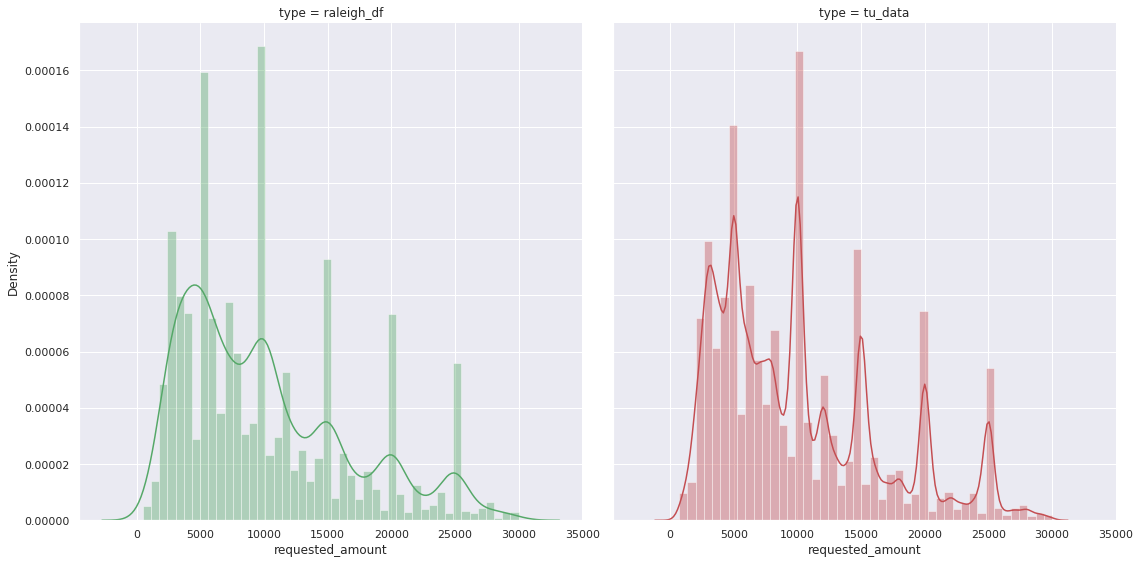

In [21]:
# density + remove outliers 
temp = pd.concat([raleigh_df[['requested_amount','type']],tu_data.rename(columns={'loan_amnt':'requested_amount'})[['requested_amount','type']]])
g = sns.FacetGrid(temp[temp['requested_amount'] < thr], col="type",hue="type", height=8, palette=['g','r'])
g.map(sns.distplot, "requested_amount",bins=int(np.sqrt(len(raleigh_df['requested_amount'].unique()))));

We also want to verify that the offered interest rate in Raleigh seem similar to those in the general population. 
Create a histogram to describe the distribution of offered interest rates in Raleigh and interest rates in the general population. Do the distributions look similar?

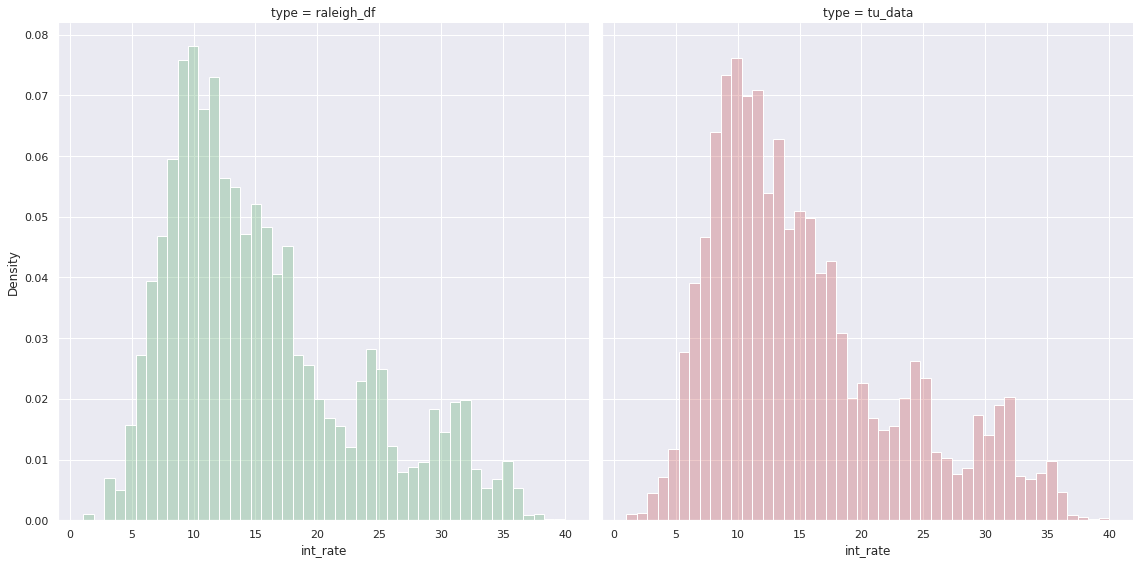

In [22]:
temp = pd.concat([raleigh_df[['int_rate','type']],tu_data[['int_rate','type']]])
g = sns.FacetGrid(temp, col="type",hue="type", height=8, palette=['g','r'])
g.map(sns.histplot, "int_rate",stat="density",bins=int(np.sqrt(len(raleigh_df['int_rate'].unique()))), alpha=0.3);

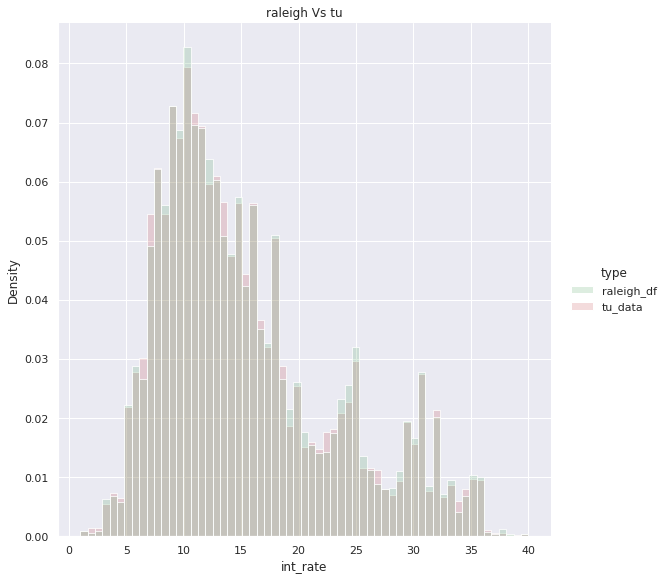

In [23]:
sns.displot(temp,
            x ='int_rate',hue='type',bins = int(np.sqrt(len(tu_data['int_rate'].unique()))), height=8, alpha=0.2,aspect=1, stat="density",palette = ['g','r'], common_norm=False).set(title= 'raleigh Vs tu');

Describe the interest rate distribution using `sns.distplot` in the Raleigh dataframe and in TU.

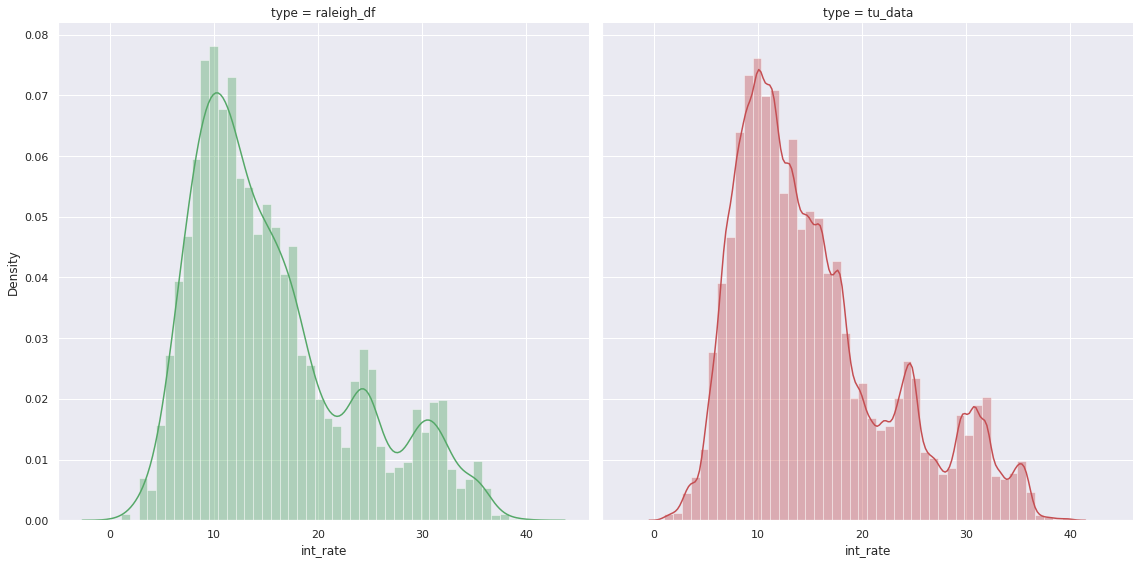

In [24]:
# density + remove outliers 
temp = pd.concat([raleigh_df[['int_rate','type']],tu_data[['int_rate','type']]])
g = sns.FacetGrid(temp, col="type",hue="type", height=8, palette=['g','r'])
g.map(sns.distplot, "int_rate",bins=int(np.sqrt(len(raleigh_df['int_rate'].unique()))));

Additionally, we want to make sure the credit scores are not visibly different in Raleigh from the general population, as this might mean that the data we obtained from the town might not be representative of the general popuation.

Create a histogram to describe the distribution of credit scores in the Raleigh sample and in the general population. Do the distributions look similar? How many bins did you use?

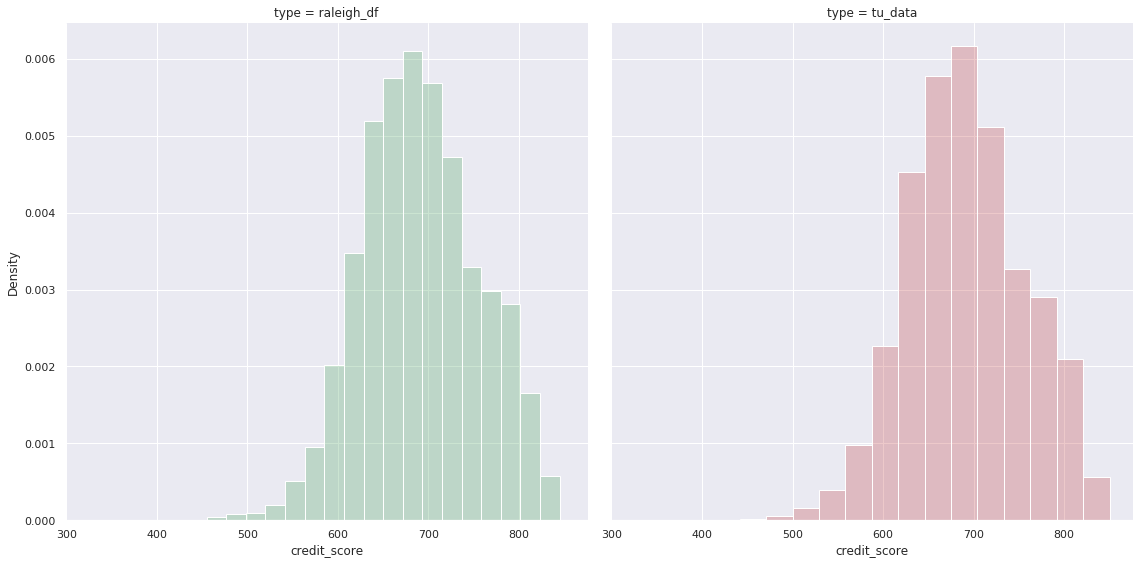

In [25]:
temp = pd.concat([raleigh_df[['credit_score','type']],tu_data[['credit_score','type']]])
temp = temp[temp.credit_score.between(300, 850)] 
g = sns.FacetGrid(temp, col="type",hue="type", height=8, palette=['g','r'])
g.map(sns.histplot, "credit_score",stat="density",bins=int(np.sqrt(len(raleigh_df['credit_score'].unique()))), alpha=0.3);

Describe the credit score distribution using `sns.distplot`  in the Raleigh dataframe and in TU.

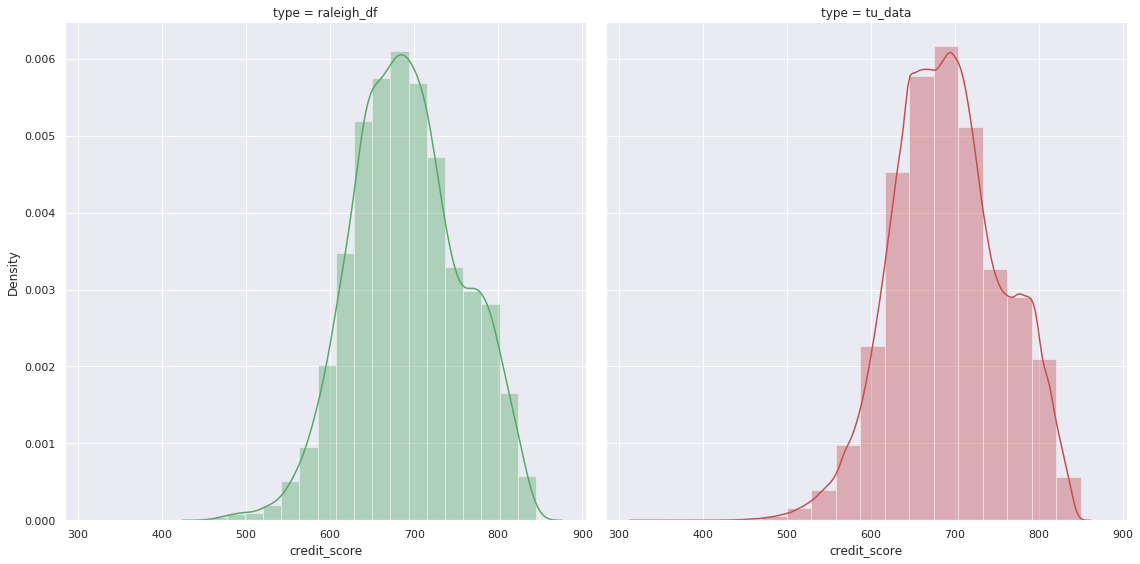

In [26]:
# density + remove outliers 
g = sns.FacetGrid(temp, col="type",hue="type", height=8, palette=['g','r'])
g.map(sns.distplot, "credit_score",bins=int(np.sqrt(len(raleigh_df['credit_score'].unique()))));

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

In [27]:
temp = pd.concat([raleigh_df[['listing_term','type']], tu_data[['listing_term','type']]])

In [28]:
temp.groupby(['type','listing_term']).listing_term.count().unstack()

listing_term,36.0,60.0
type,,
raleigh_df,4880,3893
tu_data,542102,430621


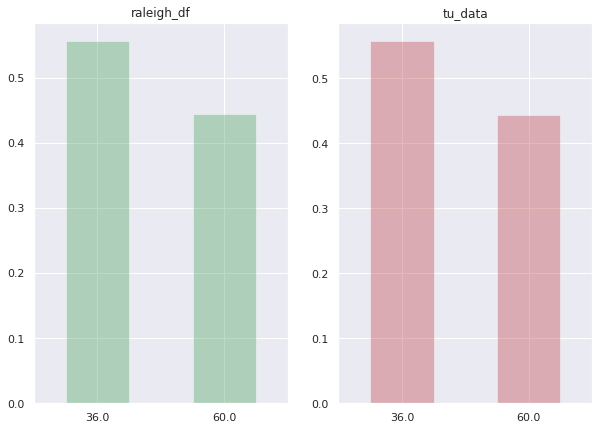

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
tu_data['listing_term'].value_counts(normalize=True).plot.bar(title='tu_data', rot=0, color='r', alpha=0.4, ax = axes[1]);
raleigh_df['listing_term'].value_counts(normalize=True).plot.bar(title='raleigh_df', rot=0, color='g', alpha=0.4, ax = axes[0]);

# CLT in action

One more thing before we start the test. Our goal is to check whether, for which we'll run some statistical test (you probably already know which) which checks if something belongs to a noraml distribution with some mean and some variance. But... is activation normally distributed in the Raliegh sample? 

> The activation distribution is Bernoli since there is only two categorial option for each sample.
The average of the activation distribution is Binomi, therefore, for large number of samples the distribution of the average activation is normal (due to CLT). 

The reason why we can assume normality is because we're checking averages of samples and we're relying on the Central Limit Theorem. We won't prove the theorem, but let's test it for a bit. 

Write a function which takes a pandas series S and a natural number n and creates a series of means of samples (with replacement) of n entries from S. Decide for yourself on the length of the output series. You can also use a different data structure if you find it more suitable as the output.

In [30]:
def sample(S, n):
    means = [] 
    for i in range(int(np.sqrt(len(S)))):
        samp = S.sample(n=n, replace=True)
        mean = np.array(samp).mean()
        means.append(mean)
    return means

Optionally- also create a function which, given the same input as above, plots a histogram of the series of means, and also indicates the mean of this series.

Generate plots of the series of means of activation in Raleigh and in TU for n = 1, 2, 5, 10, 100, 1000 and 1e6, and indicate their means. Does the distribution approach a normal distribution as $n\to\infty$ in your opinion?

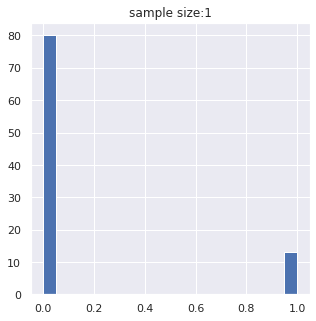

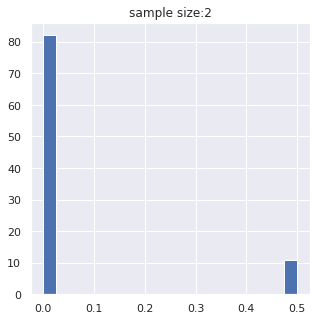

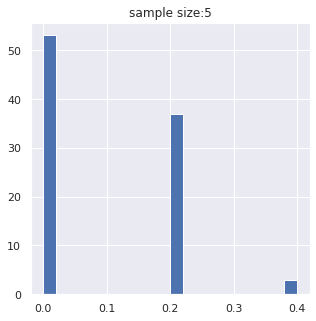

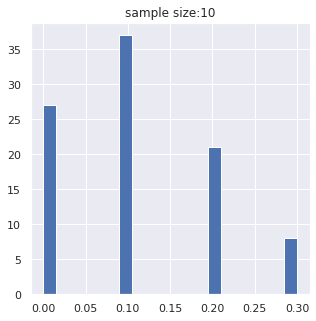

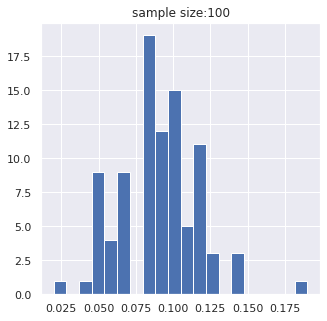

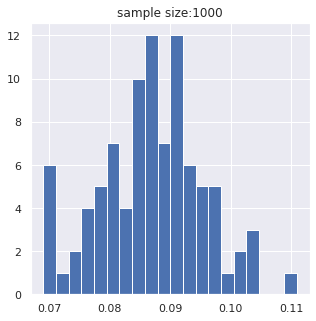

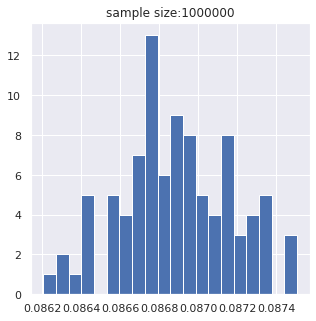

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
for i,n in enumerate([1, 2, 5, 10, 100, 1000, int(1e6)]):
    plt.figure()
    plt.hist(sample(raleigh_df.offer_accepted, n), bins = 20);
    plt.title('sample size:'+str(n))
    plt.show()

Now that your fuction is ready, it's time to make it part of our infrastucture:
* Inside the `pagayapro` repo, create a branch called `feature/{your_user_name}/clt_tester/`.
* Create a file called `clt.py` inside `~/pagayapro/users/{user_name}/assignment1/` 
* Copy the two finctions you just created into the file.
* Push your file to `main`, open a PR and ask your mentor to review it. Once approved, rebase and merge.

In [32]:
# done

# Statistical test 

pip install --upgrade --no-deps statsmodelsAs mentioned in the Notion doc, the activation in Raleigh before deployment was measured at 6.85%. In this section, you will run a test to check whether the activation in Raleigh is indeed different following the flyer program. 

In [33]:
from statsmodels.stats.proportion import proportions_ztest

Run a statistical test to check whether the current activation rate in Raleigh is different from 6,85%:
1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error? What is the power of your test?
3. Is the sample mean significantly different from the past value of 6.85?
4. Interpret your results. Can you declare the program as successful in increasing activation (what is the probability of wrongfully declaring it successful)?
5. Are there any other possible explanations for the change in activation that you observed? Discuss the possible drawbacks of our current test.

Use `proportions_ztestz` from `statsmodels.stats.proportion` in order to perform the test. Are your results significant?

> <b>Null Hypothesis:</b> The activation rate in Raleigh is equal to 6.85%.<br/>
> <b>Alternative hypothesis:</b> The activation rate in Raleigh is 10%.<br/>

In [34]:
H0 = 0.0685
H1 = 0.1
n = raleigh_df.offer_accepted.count()
stat, p_value = proportions_ztest(count=raleigh_df.offer_accepted.sum(), nobs=n, value=H0, alternative='larger')
alpha = 0.05
print(f'z_stat: {stat:.4f}, p_value: {p_value:.4f}')
if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

# type I
print('The probability of an error of type I is', alpha)

# type II
null_std = np.sqrt((H0 * (1 - H0)) / n)
alternative_std = np.sqrt((H1 * (1 - H1)) / n)
z_a = st.norm.ppf(.95)
x = (z_a * null_std) + H0
betta = st.norm.cdf((x - H1) / alternative_std)
print(f'The probability of an error of type II is {betta:.4f}')

z_stat: 6.1054, p_value: 0.0000
We reject the null hypothesis
The probability of an error of type I is 0.05
The probability of an error of type II is 0.0000


Do you see any possible problems in your methodology? What other factors can explain the change in activation, if such a change exists?

> The times have changes and it may cause the difference in the activation rates.

# A/b test

In order to isolate temporal and environmental effects on activation, we'll run an a/b test, comparing the activation rate in Raleigh to that of Lubbock, TX, another town in which Pagaya operates without a flyer program. 

The activation forms for Lubbock also appear in the `offers` subdirectory of the `ASSIGNMENT1_DATA` folder. Read all files from this folder whose name contains the substring 'lubbock', and create a dataframe of final offers called `lubbock_df`, drop unnecessary rows from it, and enrich it with TU features.

In [35]:
lubbock_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*lubbock*")
    )
)

In [36]:
# read
lubbock_df = pd.concat([pd.read_csv(i) for i in lubbock_forms])
# convert to date type
lubbock_df['offer_date'] = pd.to_datetime(lubbock_df['offer_date'], format='%Y-%m-%d')
lubbock_df = lubbock_df.sort_values('offer_date').groupby('id', as_index=False).last()
# enrich with TU
lubbock_df = lubbock_df.merge(tu_data, how='left', left_on = ['id','sequence_num'], right_on=[tu_data.index,'sequence_num'] )
lubbock_df['type'] = 'lubbock_data'

What is the average interest rate in Lubbock? What is it among accepting borrowers?

In [37]:
lubbock_df.int_rate.mean()

15.505397526501767

In [38]:
lubbock_df[lubbock_df['offer_accepted'] == True].int_rate.mean()

13.553895131086144

What is the average credit score in Lubbock? What is it among accepting borrowers?

In [39]:
lubbock_df.credit_score.mean()

690.0338339222615

In [40]:
lubbock_df[lubbock_df['offer_accepted'] == True].credit_score.mean()

730.5337078651686

What is the rate of activation in Lubbock?

In [41]:
lubbock_df.offer_accepted.mean()

0.04717314487632509

## Caution about a/b test 

Note that this is not a classical a/b test. Usually, in such a test, one creates two random subgroups from the general population and applies a manipulation to one of them in order to see if the manipulation had an effect. However, in this case, it is very complicated to isolate a random subgroup from any population and deploy the flyer program only on it.
Thus, due to production limitation, we have to make do with what we got.

In order to justify the use of an a/b test for this situation, we should at least verify that the borrower population in Lubbock and Raleigh seem as though they were randomly selected from the general population. We have actually already checked it for Raleigh above. Add TU features to the loan amount, interest rate, credit score and term comparisons and see if there any major differences between the three populations (Lubbock, Raleigh and TU).

The proportion of removed samples is: 0.049001023351759036


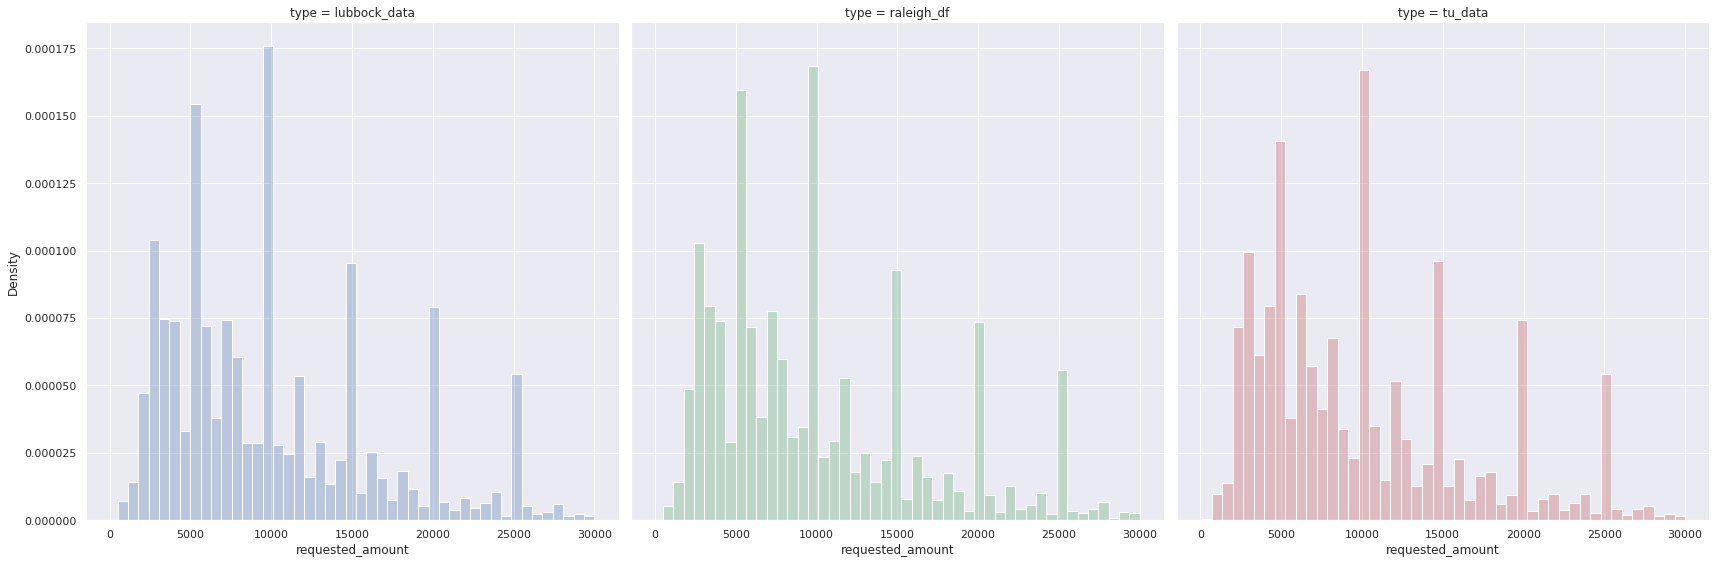

In [42]:
# loan amount
# density + remove outliers 
temp = pd.concat([lubbock_df[['requested_amount','type']], raleigh_df[['requested_amount','type']],tu_data.rename(columns={'loan_amnt':'requested_amount'})[['requested_amount','type']]])
thr = temp['requested_amount'].quantile(.75) + 1.5*(temp['requested_amount'].quantile(.75)-temp['requested_amount'].quantile(.25))
print('The proportion of removed samples is:',(temp['requested_amount'] >thr).mean())
g = sns.FacetGrid(temp[temp['requested_amount'] < thr], col="type",hue="type", height=8, palette=['b','g','r'])
g.map(sns.histplot, "requested_amount",stat="density",bins=int(np.sqrt(len(raleigh_df['requested_amount'].unique()))), alpha=0.3);

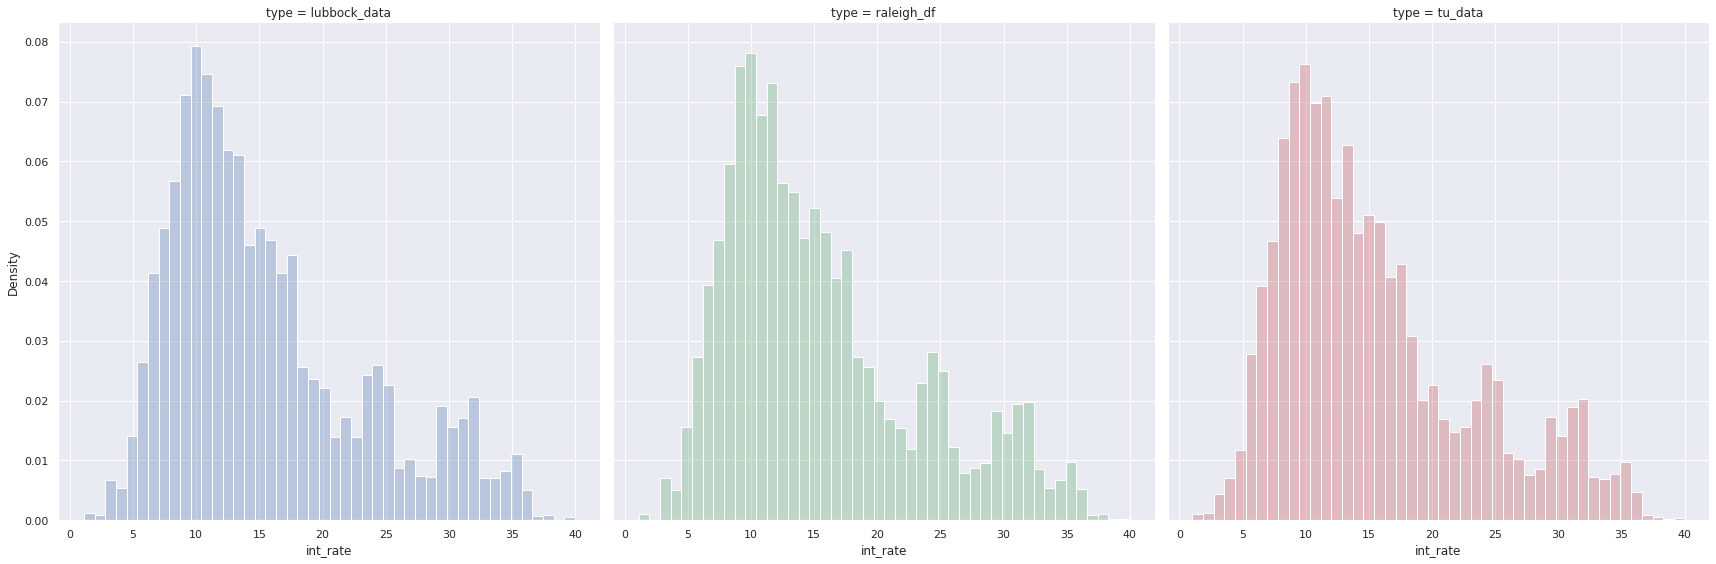

In [43]:
# intrest rate
temp = pd.concat([lubbock_df[['int_rate','type']], raleigh_df[['int_rate','type']],tu_data[['int_rate','type']]])
g = sns.FacetGrid(temp, col="type",hue="type", height=8, palette=['b','g','r'])
g.map(sns.histplot, "int_rate",stat="density",bins=int(np.sqrt(len(raleigh_df['int_rate'].unique()))), alpha=0.3);

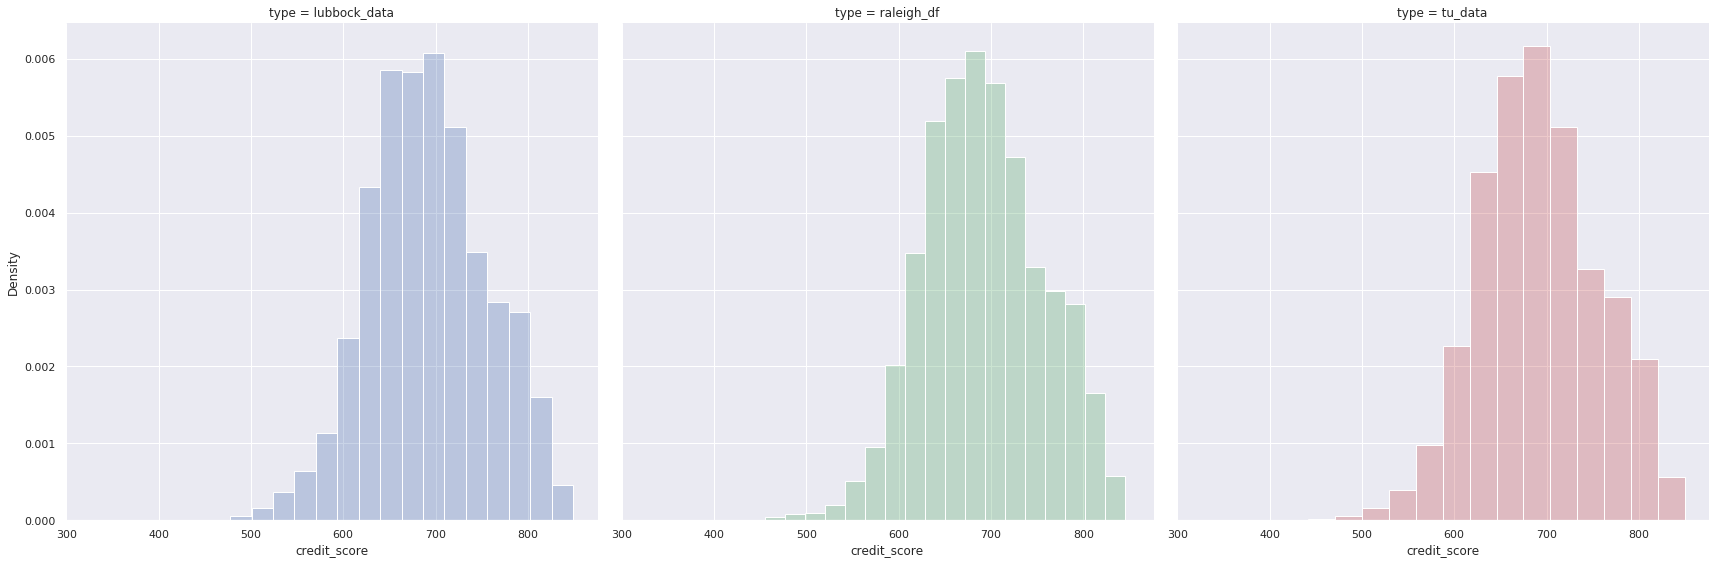

In [44]:
# credit score
temp = pd.concat([lubbock_df[['credit_score','type']],raleigh_df[['credit_score','type']], tu_data[['credit_score','type']]])
temp = temp[temp.credit_score.between(300, 850)] 
g = sns.FacetGrid(temp, col="type",hue="type", height=8, palette=['b','g','r'])
g.map(sns.histplot, "credit_score",stat="density",bins=int(np.sqrt(len(raleigh_df['credit_score'].unique()))), alpha=0.3);

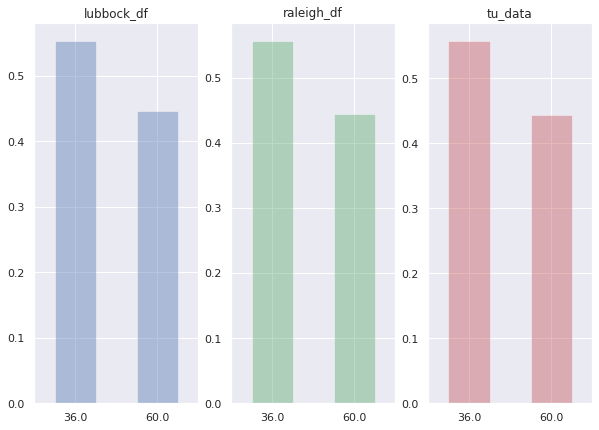

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,7))
lubbock_df['listing_term'].value_counts(normalize=True).plot.bar(title='lubbock_df', rot=0, color='b', alpha=0.4, ax = axes[0]);
raleigh_df['listing_term'].value_counts(normalize=True).plot.bar(title='raleigh_df', rot=0, color='g', alpha=0.4, ax = axes[1]);
tu_data['listing_term'].value_counts(normalize=True).plot.bar(title='tu_data', rot=0, color='r', alpha=0.4, ax = axes[2]);

## Performing the test

Use the function you created in the file `clt.py` to plot the series of means of activation in Raleigh and Lubbock for samples of size n= 1, 10, 1000 and 1e6, and compare the means of the two histograms. To they seem to converge to the same value?

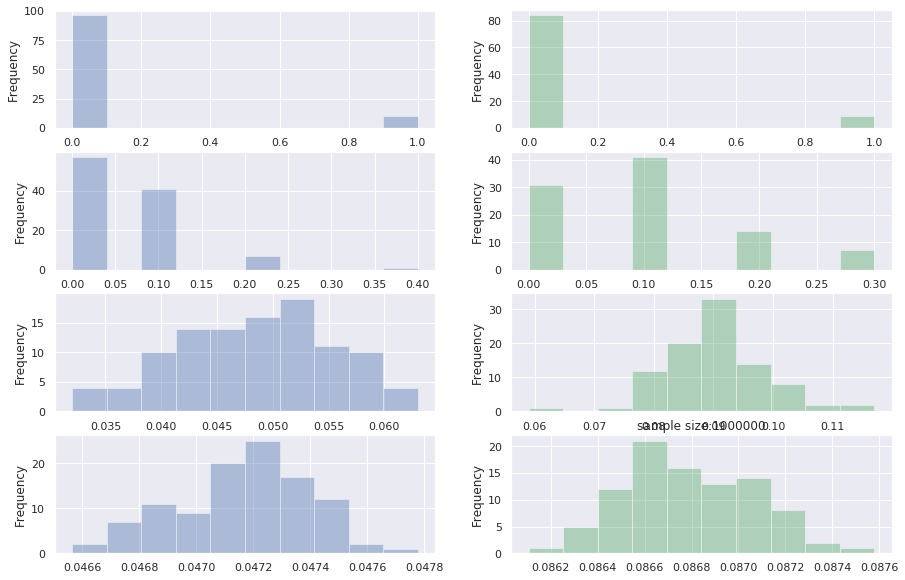

In [46]:
sns.set(rc={'figure.figsize':(5,5)})
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
for i,n in enumerate([1, 10, 1000, int(1e6)]):
    pd.Series(sample(raleigh_df.offer_accepted, n)).plot(kind='hist', alpha=0.4, color='g', ax = axes[i][1]);
    pd.Series(sample(lubbock_df.offer_accepted, n)).plot(kind='hist', alpha=0.4, color='b', ax = axes[i][0]);
    plt.title('sample size:'+str(n))
plt.show()

Apply a statistical test to see whether the activation rate in Raleigh, NC is significantly larger than Lubbock, TX. Clearly state and validate your test's assumption. 

1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error?
3. Are the two samples significantly different? 
4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?

> <b>Null Hypothesis:</b> The activation rate in Raleigh is equal to the activation rate in Lubbock.<br/>
> <b>Alternative hypothesis:</b> The activation rate in Raleigh is higher than the activation rate in Lubbock.<br/>

Use the `proportions_ztestz` function from `statsmodels.stats.proportion` to perform a comparison between the activation probability in Lubbock and in Raleigh. 

In [47]:
H0 = 0
n = raleigh_df.offer_accepted.count()
m = lubbock_df.offer_accepted.count()
stat, p_value = proportions_ztest(count=[raleigh_df.offer_accepted.sum(), lubbock_df.offer_accepted.sum()], nobs=[n, m], value=H0, alternative='larger')
alpha = 0.05
print(f'z_stat: {stat:.4f}, p_value: {p_value:.4f}')
if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

# type I
print('The probability of an error of type I is', alpha)

z_stat: 11.3577, p_value: 0.0000
We reject the null hypothesis
The probability of an error of type I is 0.05


> According to hypothesis test the samples are dignificantly different (tiny p-value).

Interprest your results; do you observe a significant change in activation in Raleigh? What is the probability of wrongfully declaring the program successful?

> Just by looking at the results of the hypothesis test, we can say with confidence that the activation rate in Raleigh is significantly higher than the activation rate in Lubbock. Since we don't know what was the difference in the activation rate between the two populations before the program we can't say for sure the program is successful. 

# Testing for activation in sub-populations

Now that you applied the a/b test to the Lubbock and Raleigh datasets, it is now required that you make a similar comparison on different subsets of the data within various credit score and loan amount bins. To do so, let us first decide on how to segment our data.

You are asked to divide your data into 10 bins according to loan amount, and then divide each of those bins into 10 bins according to loan amount. The most staightforward way of doing this is by using the `pd.qcut` function; first dividing the data into 10 quantiles of credit score and then dividing each of these quantiles into 10 according to loan amount.

Divide your datasets as above and add two columns to your data which indicate the (credit_score, loan_amnt) of the bin.

In [48]:
tu_data['credit_score_bin'], credit_score_bins = pd.qcut(x=tu_data.credit_score, q=10, retbins=True, labels=range(10))

In [49]:
bins = {}
for label in range(10):
    ret, loan_amnt_bins = pd.qcut(x=tu_data[tu_data.credit_score_bin == label].loan_amnt, q=10, retbins=True)
    bins[pd.Interval(credit_score_bins[label], credit_score_bins[label+1])] = loan_amnt_bins

In [50]:
raleigh_df['credit_score_bin'] = pd.cut(raleigh_df['credit_score'], credit_score_bins)
lubbock_df['credit_score_bin'] = pd.cut(lubbock_df['credit_score'], credit_score_bins)

In [51]:
for cs_bin in raleigh_df['credit_score_bin'].unique():
    raleigh_df.loc[raleigh_df['credit_score_bin'] == cs_bin,'loan_amnt_bin'] = pd.cut(raleigh_df[raleigh_df['credit_score_bin'] == cs_bin]['loan_amnt'], bins[cs_bin])
    lubbock_df.loc[lubbock_df['credit_score_bin'] == cs_bin,'loan_amnt_bin'] = pd.cut(lubbock_df[lubbock_df['credit_score_bin'] == cs_bin]['loan_amnt'], bins[cs_bin])

Run an a/b test on each of the bins in your data and create a $10\times 10$ table containing the $p$ value of each test.

In [52]:
p_values = {}
for cs_bin in bins:
    cs_p_values = []
    raleigh_df_ = raleigh_df.query('credit_score_bin == @cs_bin')
    lubbock_df_ = lubbock_df.query('credit_score_bin == @cs_bin')
    for la_bin in sorted(lubbock_df_.loan_amnt_bin.unique(), key=lambda x:x.left):
        H0 = 0
        raleigh_df_bin = raleigh_df_.query('loan_amnt_bin == @la_bin')
        lubbock_df_bin = lubbock_df_.query('loan_amnt_bin == @la_bin')
        n = raleigh_df_bin.offer_accepted.count()
        m = lubbock_df_bin.offer_accepted.count()
        stat, p_value = proportions_ztest(count=[raleigh_df_bin.offer_accepted.sum(), lubbock_df_bin.offer_accepted.sum()], nobs=[n, m], value=H0, alternative='larger')
        cs_p_values.append(p_value)
    p_values[cs_bin] = cs_p_values

p_values = pd.DataFrame(p_values)
p_values

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


,"(1.0, 612.0]","(612.0, 637.0]","(637.0, 655.0]","(655.0, 672.0]","(672.0, 689.0]","(689.0, 705.0]","(705.0, 724.0]","(724.0, 750.0]","(750.0, 784.0]","(784.0, 850.0]"
0,0.000126,0.002028,0.105982,0.178387,0.306187,0.000222,0.108480,0.252960,0.304865,0.452712
1,0.000725,0.375919,0.079592,0.089486,0.030086,0.043176,0.966930,0.613998,0.843292,0.069362
2,0.001170,0.314121,0.585919,0.047111,0.189042,0.002139,0.169000,0.155528,0.110408,0.810630
3,0.080951,0.131942,0.158455,0.014139,0.040173,0.052740,0.775735,0.036580,0.037174,0.142734
4,0.071051,0.018267,0.249587,0.381130,0.023232,0.748927,0.181173,0.458929,0.333551,0.663714
5,0.000630,0.001264,0.007938,0.095697,0.873560,0.194644,0.756536,0.003169,0.136121,0.300093
6,0.000062,0.015021,0.258376,0.406334,0.222869,0.186542,0.359378,0.014790,0.892053,0.041306
7,0.059956,0.230610,0.036350,0.024125,NaN,0.157437,0.167532,0.291004,0.095803,0.627665
8,0.000006,0.208676,0.044686,0.370185,0.335893,0.079624,0.259001,0.008947,0.125083,0.019620
9,0.003083,0.173446,0.022403,0.653791,0.178676,0.009442,0.253606,0.219061,0.495354,0.073844


Use the [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to represent your table as a heatmap. You can also use it on a suitable table of boolean values to get a more robus representation of which experiments turned out significant.

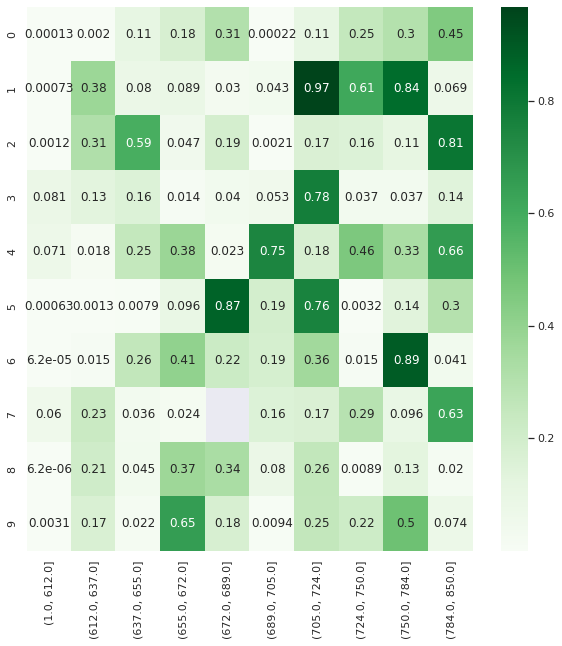

In [53]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(p_values, annot= True, cmap = 'Greens');

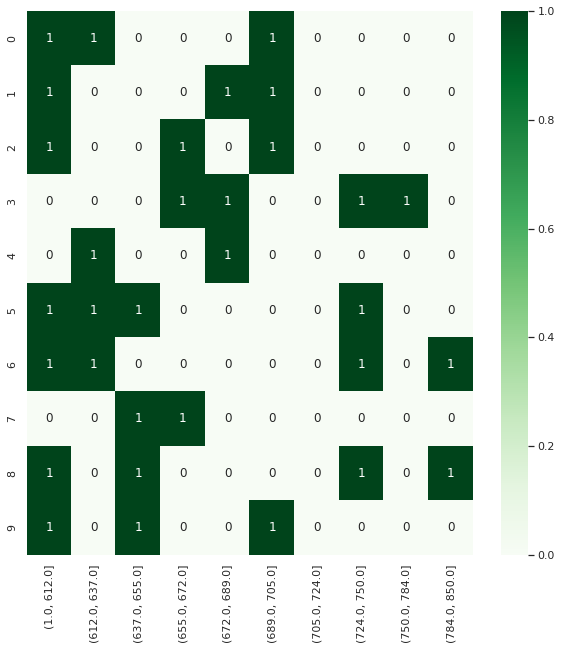

In [54]:
sns.heatmap((p_values < 0.05), annot= True, cmap = 'Greens'); # 1 = reject the null hypothesis

What is the probability of falsely rejecting the null hypothesis in each cell? What is the probability of falsely rejecting the null hypothesis in at least one of the cells (i.e. what is the **family wise error rate**)?

In other words, given that we made $m$ experiments, with confidence level $\alpha$, what is the probabilty $\mathbb{P}\left(\bigcup_i X_i \le q_{\alpha}\right)$? 

_Note_: you may assume that sampling from different bins are independent.

In [55]:
alpha = 0.05
print(f'The probability of falsely rejecting the null hypothesis in each cell is {alpha}')
print(f'The probability of falsely rejecting the null hypothesis in at least one of the cells is {1 - np.power(1-alpha, 100)}')

The probability of falsely rejecting the null hypothesis in each cell is 0.05
The probability of falsely rejecting the null hypothesis in at least one of the cells is 0.994079470779666


## Bonferroni correction 

One way of assuring that your FWER remains below $\alpha=0.05$ is to apply a <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">**Bonferroni correction**</a>. This means that we set the signficance level of each individual test to $\alpha/m$, where $m=100$ is the number of tests (see, e.g., Wikipedia for an explanation). 

Use a Bonferroni correction on your segmented a/b test and output a $10\times10$ table of boolean values, indicating which test gave a significant result under this correction.

In [56]:
hypothesis_tests_results = pd.DataFrame(p_values) < (alpha / 100)
hypothesis_tests_results

,"(1.0, 612.0]","(612.0, 637.0]","(637.0, 655.0]","(655.0, 672.0]","(672.0, 689.0]","(689.0, 705.0]","(705.0, 724.0]","(724.0, 750.0]","(750.0, 784.0]","(784.0, 850.0]"
0,True,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


How many of your tests came out significant under this correction?

In [57]:
hypothesis_tests_results.sum().sum()

4

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

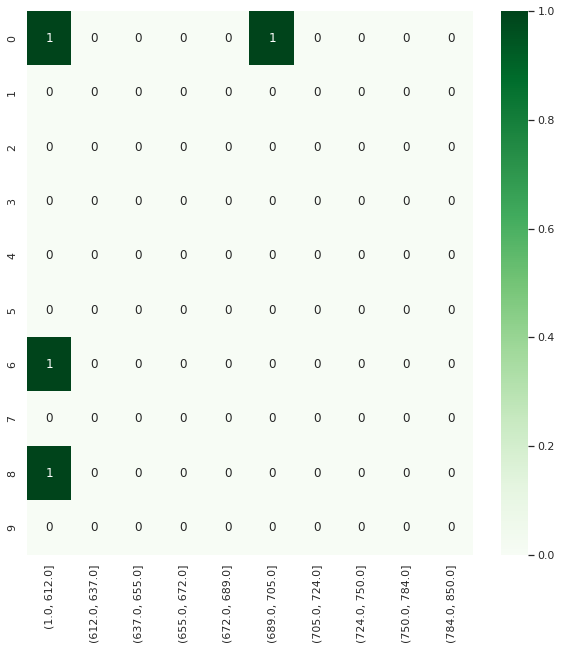

In [58]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(hypothesis_tests_results, annot= True, cmap = 'Greens');

## BH correction 

The Bonferroni correction is often criticized for being too restrictive, as you probably noticed in the last subsection. A more commonly used method for correcting $\alpha$ values is the Benjamini-Hochberg method. You can <a href="https://www.youtube.com/watch?v=K8LQSvtjcEo">check out the quest</a> for a nice explanation about it.

Start by arranging the $p$-values of your original test as a series and listing them in ascending order. You can use the `pd.DataFrame.stack` and `pd.Series.sort_values` methods.

In [59]:
p_values_bh = p_values.stack().sort_values().reset_index()
p_values_bh.columns = ['loan_amnt_bin', 'credit_score_bin', 'p_value']
p_values_bh

,loan_amnt_bin,credit_score_bin,p_value
0,8,"(1.0, 612.0]",0.000006
1,6,"(1.0, 612.0]",0.000062
2,0,"(1.0, 612.0]",0.000126
3,0,"(689.0, 705.0]",0.000222
4,5,"(1.0, 612.0]",0.000630
...,...,...,...
94,2,"(784.0, 850.0]",0.810630
95,1,"(750.0, 784.0]",0.843292
96,5,"(672.0, 689.0]",0.873560
97,6,"(750.0, 784.0]",0.892053


Plot your sorted $p$-values

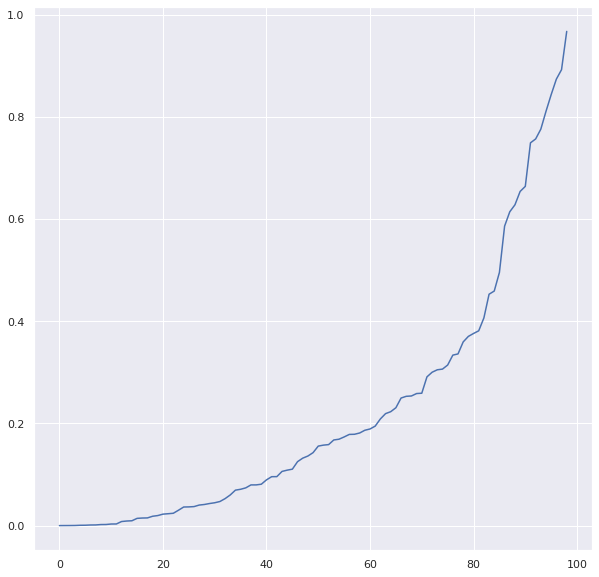

In [60]:
p_values_bh.p_value.plot();

For each entry of the new series, compute the value compute the value $\frac{i}{m}\cdot\alpha$, where $i$ is the ordinal place of the entry (i.e. 1,2,...len(series)), $m=100$ and $\alpha=0.05$ as above. Add a plot of these values to your $p$-values plot.

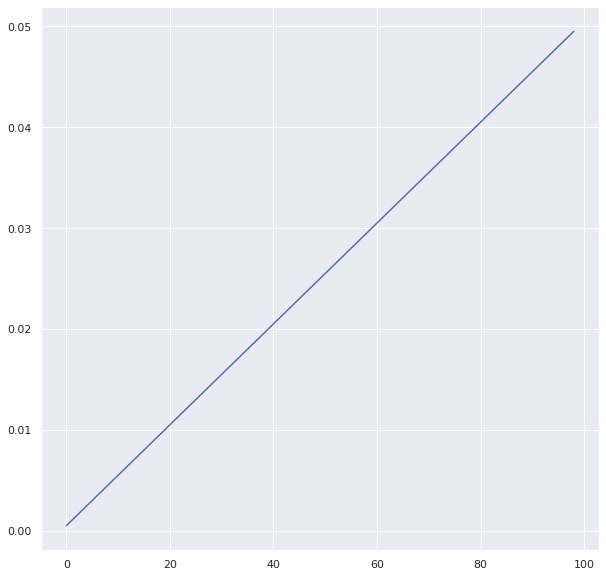

In [61]:
p_values_bh['bh'] = ((p_values_bh.index + 1) / 100) * 0.05
p_values_bh.bh.plot();

Find the largest index $i$ for which the $p$-value in the $i$-th place in the series is smaller than $\frac{i}{m}\cdot\alpha$. That is- the last index in the plot you just created where the $p$-values line lies below the _adjusted_-$\alpha$ line.

In [62]:
idx = ((p_values_bh['p_value']  < p_values_bh['bh']) * (p_values_bh.index + 1)).max() - 1
idx

11

Reject the null hypothesis for all test before and including this index, and accept it for all others. Reformat your table into a $10\times 10$ dataframe; for which bins did we get a significant result in the corrected test?

In [63]:
p_values_bh['reject_null'] = (p_values_bh.index < idx)
hypothesis_tests_results = p_values_bh.set_index(['loan_amnt_bin', 'credit_score_bin'])['reject_null'].unstack()
hypothesis_tests_results

credit_score_bin,"(1.0, 612.0]","(612.0, 637.0]","(637.0, 655.0]","(655.0, 672.0]","(672.0, 689.0]","(689.0, 705.0]","(705.0, 724.0]","(724.0, 750.0]","(750.0, 784.0]","(784.0, 850.0]"
loan_amnt_bin,,,,,,,,,,
0,True,True,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,NaN,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False


Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

### Validating your results

You can validate your results (for both corrections) using the <a href= "https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html">`statsmodels.stats.multitest.multipletests`</a> package.